In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/datasets.csv")

In [ ]:
data = data.dropna()

In [ ]:
data

,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,GPS.lat,GPS.long,GPS.alt
8,-0.049648,0.062933,0.288295,17.581442,78.120622,452.931519
9,-0.049648,0.062933,0.288295,17.581442,78.120622,452.931519
10,-0.049648,0.062933,0.288295,17.581442,78.120622,452.931519
11,-0.049648,0.062933,0.288295,17.581442,78.120622,452.931519
12,-0.049648,0.062933,0.288295,17.581442,78.120622,452.931519
...,...,...,...,...,...,...
4451,-0.236115,0.120358,0.163920,17.596746,78.125394,454.173584
4452,0.081398,0.278084,-0.130926,17.596746,78.125394,454.173584
4453,0.352739,0.790846,-0.207200,17.596746,78.125394,454.173584
4454,0.221223,0.591044,-0.688806,17.596746,78.125394,454.173584


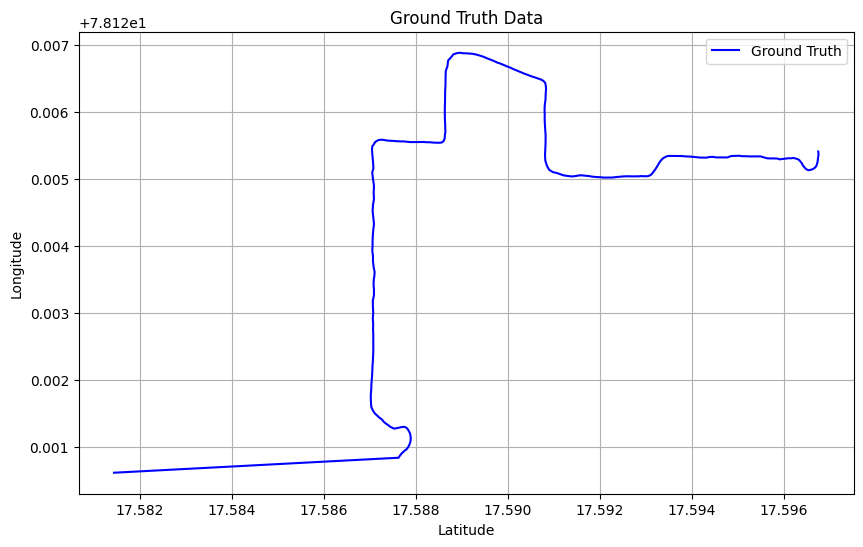

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['GPS.lat'], data['GPS.long'], label='Ground Truth', color='blue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Ground Truth Data')
plt.legend()
plt.grid()
plt.show()

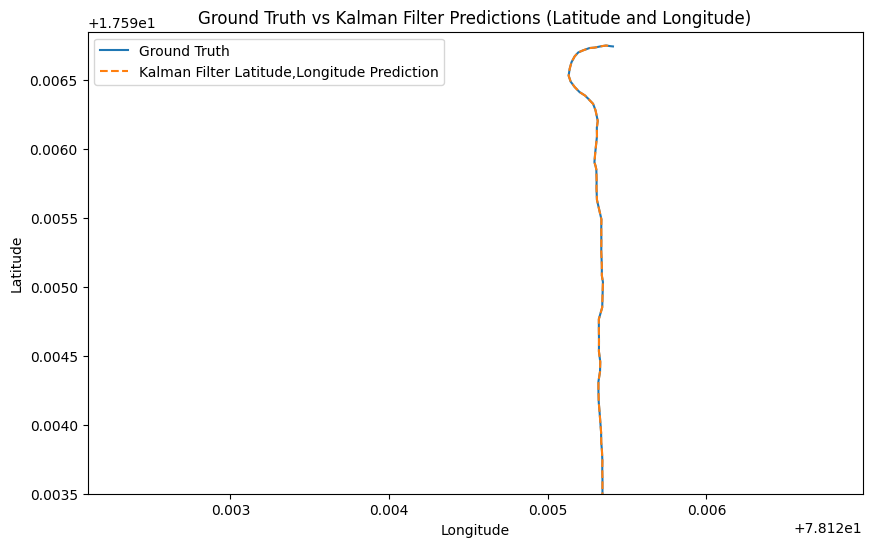

In [ ]:
import numpy as np

# Initialize Kalman Filter parameters for 2D (latitude and longitude)
initial_state = np.array([0, 0])  # Initial position [latitude, longitude]
initial_estimate_error = np.diag([1.0, 1.0])  # Initial estimate error covariance matrix
process_variance = np.diag([0.1, 0.1])  # Process noise covariance matrix
measurement_variance = np.diag([0.5, 0.5])  # Measurement noise covariance matrix

# Initialize state and estimate error
state = initial_state
estimate_error = initial_estimate_error

# Lists to store predictions and ground truth
predictions = []
ground_truth = data[['GPS.lat', 'GPS.long']].values

# Kalman Filter Loop
for measurement in ground_truth:
    # Prediction
    prediction = state
    prediction_error = estimate_error + process_variance

    # Update
    kalman_gain = np.dot(prediction_error, np.linalg.inv(prediction_error + measurement_variance))
    state = prediction + np.dot(kalman_gain, (measurement - prediction))
    estimate_error = np.dot((np.identity(2) - kalman_gain), prediction_error)

    predictions.append(state)

# Extract latitude and longitude predictions
predicted_latitudes = [x[0] for x in predictions]
predicted_longitudes = [x[1] for x in predictions]

# Plot ground truth and Kalman Filter predictions for latitude and longitude
plt.figure(figsize=(10, 6))
plt.plot(data['GPS.long'], data['GPS.lat'], label='Ground Truth')
#plt.plot(data['GPS.long'], predicted_latitudes, label='Kalman Filter Latitude Prediction', linestyle='--')
#plt.plot(predicted_longitudes, data['GPS.lat'], label='Kalman Filter Longitude Prediction', linestyle='--')
plt.plot(predicted_longitudes, predicted_latitudes, label='Kalman Filter Latitude,Longitude Prediction', linestyle='--')
plt.xlabel('Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ground Truth vs Kalman Filter Predictions (Latitude and Longitude)')
plt.legend()
plt.ylim(17.5935, max(data['GPS.lat']) + 0.0001)
plt.xlim(78.1221, max(data['GPS.long']) + 0.0001)
plt.show()